In [13]:
import numpy as np

import invisible_cities.cities.irene as irene
import invisible_cities.core.system_of_units as units
from invisible_cities.cities.base_cities import S12Params as S12P

import invisible_cities.reco.peak_functions_c as cpf
import invisible_cities.reco.peak_functions as pf

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
datadir  = "/Users/Gonzalo/github/NEXTdata/Kr2016/mar/rwf/"
filename = datadir + "dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_RWF_10000.root.h5"

s1_params = S12P(tmin   =  99 * units.mus,
                 tmax   = 101 * units.mus,
                 stride =   4,
                 lmin   =   4,
                 lmax   =  16,
                 rebin  = False)

# parameters for s2 searches
s2_params = S12P(tmin   =  101 * units.mus,
                 tmax   = 1199 * units.mus,
                 stride =   40,
                 lmin   =   80,
                 lmax   = 100000,
                 rebin  = True)

irene_instance = irene.Irene(0,
                             [filename],
                             "dummy.h5",
                             "ZLIB4",
                             1,
                             38000,
                             5 * units.adc,
                             100,
                             3 * units.adc,
                             0.2 * units.adc,
                             1.0 * units.adc,
                             100,
                             3.5 * units.pes,
                             s1_params,
                             s2_params,
                             30 * units.pes)

In [4]:
irene_instance.run(40)


                 Irene will run a max of 40 events
                 Input Files = ['/Users/Gonzalo/github/NEXTdata/Kr2016/mar/rwf/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_RWF_10000.root.h5']
                 Output File = dummy.h5
                          

                 S1 parameters S12Params(tmin=99000.0, tmax=101000.0, stride=4, lmin=4, lmax=16, rebin=False)

                 S2 parameters S12Params(tmin=101000.0, tmax=1199000.0, stride=40, lmin=80, lmax=100000, rebin=True)

                 S2Si parameters
                 threshold min charge per SiPM = 3.5 pes
                 threshold min charge in  S2   = 30 pes
                          
Opening /Users/Gonzalo/github/NEXTdata/Kr2016/mar/rwf/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_RWF_10000.root.h5... Events in file = 10000
# PMT                  => 12
# SiPM                 => 1792
PMT WL                 => 48000
SIPM WL                => 1200
event in file = 0, total = 1
event in file = 1, total = 2
event in file = 2, total =

40

In [5]:
def get_data(filename):
    with open(filename) as inf:
        inf.readline()
        s1ene = list(map(float, inf.readline().split()))
        inf.readline()
        s1idx = list(map(int, inf.readline().split()))
        inf.readline()
        s2ene = list(map(float, inf.readline().split()))
        inf.readline()
        s2idx = list(map(int, inf.readline().split()))
        inf.readline()
        sipmzs = [list(map(float, line.split())) for line in inf]

        return map(np.array,
                   [     s1ene,    s1idx,      s2ene,    s2idx,     sipmzs],
                   [np.float64, np.int32, np.float64, np.int32, np.float64])

In [16]:
s1e, s1i, s2e, s2i, sis = get_data("36.txt")

In [18]:
s2 = cpf.find_S12(s2e, s2i, **s2_params._asdict())

In [19]:
s2

{0: [array([ 589082.5 ,  590112.5 ,  591112.5 ,  592112.5 ,  593112.5 ,
          594112.5 ,  595112.5 ,  596112.5 ,  597112.5 ,  598112.5 ,
          599120.  ,  599981.25]),
  array([  67.44696143,  186.23150788,  339.80177223,  540.70461138,
          811.36222512,  904.94458646,  896.51120421,  714.30080047,
          424.6148206 ,  201.59348417,   86.34136163,   21.83577793])]}

In [20]:
sipms = cpf.select_sipm(sis)

In [21]:
S2Si = pf.sipm_s2_dict(sipms, s2, thr = 30.)

In [31]:
t, e = s2[0]

In [32]:
t

array([ 589082.5 ,  590112.5 ,  591112.5 ,  592112.5 ,  593112.5 ,
        594112.5 ,  595112.5 ,  596112.5 ,  597112.5 ,  598112.5 ,
        599120.  ,  599981.25])

In [40]:
np.diff(t)

array([ 1030.  ,  1000.  ,  1000.  ,  1000.  ,  1000.  ,  1000.  ,
        1000.  ,  1000.  ,  1000.  ,  1007.5 ,   861.25])

In [43]:
e, np.round(e)

(array([  67.44696143,  186.23150788,  339.80177223,  540.70461138,
         811.36222512,  904.94458646,  896.51120421,  714.30080047,
         424.6148206 ,  201.59348417,   86.34136163,   21.83577793]),
 array([  67.,  186.,  340.,  541.,  811.,  905.,  897.,  714.,  425.,
         202.,   86.,   22.]))

In [34]:
T = t // units.mus

In [35]:
T

array([ 589.,  590.,  591.,  592.,  593.,  594.,  595.,  596.,  597.,
        598.,  599.,  599.])

In [36]:
int(T[0]), int(T[-1]) + 1

(589, 600)

In [37]:
600 - 589

11

In [56]:
a = np.arange(589, 600)
a

array([589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599])

In [57]:
x = a[4:6].astype(np.int)
x

array([593, 594])

In [58]:
a[4:6] = 0
a

array([589, 590, 591, 592,   0,   0, 595, 596, 597, 598, 599])

In [59]:
x

array([593, 594])

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
import tables as tb
h5f = tb.open_file("/Users/Gonzalo/github/NEXTdata/Kr2016/mar/rwf/dst_NEXT_v0_08_09_Kr_ACTIVE_0_0_7bar_RWF_10000.root.h5")

In [70]:
import invisible_cities.database.load_db as DB
pmt = DB.DataPMT()

In [82]:
sumwf = np.sum((h5f.root.RD.pmtrwf[36, :] - np.mean(h5f.root.RD.pmtrwf[36, :], axis=1).reshape(12,1)) / pmt.adc_to_pes.values.reshape(12, 1), axis=0)

(597000, 600000)

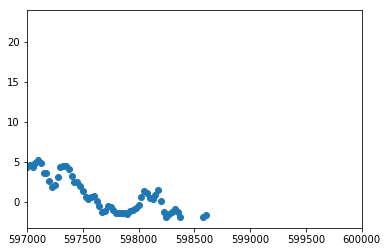

In [102]:
plt.scatter(np.argwhere(sumwf>-2) * 25, sumwf[sumwf>-2])
plt.xlim(597000, 600000)

(-5, 0)

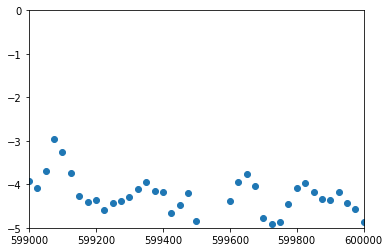

In [105]:
plt.scatter(np.arange(len(sumwf))*25, sumwf)
plt.xlim(599000, 600000)
plt.ylim(-5, 0)